#  🖥️   **AIB / SECTION 3 / PROJECT** / **18TH 정희재**
---

## **GOAL OF PROJECT**

> **목적** 
- 'E-Commerce 여성 의류 플랫폼' 데이터셋의 고객 리뷰를 통한 감성 분석에 따른 상품 추천을 하고자 한다.

> **목표**
- 감성 분석 목표
  - 고객 리뷰에서 긍정적인, 부정적인 감성을 분류하는 것.
- 상품 추천 목표
  - 고객 리뷰에 기반하여 해당 카테고리의 인기 제품을 찾아 추천하는 것.


🚨 **Data description**

- `< 23,486개의 행과 10개의 변수 >`

- `Clothing ID`: 리뷰 대상 제품 ID 코드

- `Age`: 고객의 나이

- `Title`: 리뷰 제목

- `Review Text`: 리뷰 내용

- `Rating`: 고객이 부여한 제품 점수 (1은 최악, 5는 최고)

- `Recommended IND`: 제품을 추천하는지 여부 (0은 비추천, 1은 추천)

- `Positive Feedback Count`: 다른 고객이 이 리뷰를 긍정적으로 평가한 횟수 (공감의 표현)

- `Division Name`: 제품 상위 카테고리
  - General : 일반적인 제품
  - General Petite : 일반적인 소형 제품
  - Initmates : 속옷 제품

- `Department Name`: 제품 부서 이름
  - Bottoms : 하의
  - Dresses : 드레스
  - Intimate : 속옷
  - Jackets : 재킷
  - Tops : 상의
  - Trend : 트렌드

- `Class Name`: 제품 하위 카테고리
  - Blouses : 블라우스
  - Casual bottoms : 캐주얼 바지
  - Chemises : 셔미즈
  - Dresses : 드레스
  - Fine gauge : 파인 게이지
  - Intimates : 속옷
  - Jackets : 재킷
  - Jeans : 청바지
  - Knits : 니트
  - Layering : 레이어링
  - Legwear : 레그웨어
  - Lounge : 라운지웨어
  - Outerwear : 아우터웨어
  - Pants : 바지
  - Shorts : 반바지
  - Skirts : 스커트
  - Sleep : 잠옷
  - Sweaters : 스웨터
  - Swim : 수영복
  - Trend : 트렌드

## 1. 데이터 선정 이유

### `Process 1`: 풀고자 하는 문제가 무엇인가?  

> 프로젝트 주제 : 
- **여성 의류 온라인 플랫폼 리뷰 데이터를 기반으로 해당 제품에 대한 감성(긍정 또는 부정)을 판별하여 이에 따른 제품을 추천하고자 한다.**

> 프로젝트 선정 배경:
1. 의류 플랫폼의 제품 개선 및 마케팅 전략 수립에 도움을 주기 위함이다.
2. 제품에 대한 소비자의 선호도를 파악하고 품질 향상 및 고객 만족도 향상을 위한 개선 방향을 도출하기 위함이다.
3. 이를 통해 수익을 극대화하고 지속적인 성장을 이루어내기 위함이다.

> 데이터셋 선정 근거
1. 여성 의류 온라인 플랫폼의 실제 상업적인 데이터로 23,486개의 고객 제품 리뷰를 포함하고 있기에 충분한 규모의 데이터셋이다. 이러한 리뷰 내용을 통해 향후 마케팅 전략, 제품 개선, 고객 서비스 향상 등에 대한 인사이트를 얻을 수 있다.
2. 리뷰, 평점, 추천 여부, 고객 연령 등 여러 변수 정보를 통해 가설을 세우고 분석을 수행할 수 있다.
3. 의류 플랫폼은 수많은 제품을 보유하고 있으며 개인의 취향과 관심사에 맞게 제품을 추천하는 시스템의 필요성 대두에 따라 의류 플랫폼의 경쟁력을 향상시키기 위함이다.

## 2. 데이터를 통한 가설 수립

### `Process 2`: 가설 설정 및 검증

> **가설**

- 1. 추천이 존재하지 않는 상품이라면, 부정적인 감성일 것이다.

- 2. 같은 제품군을 가진 제품 중에서 리뷰의 길이가 긴 경우 감성 점수가 긍정적일 것이다.

> **가설 검증을 위한 딥러닝 파이프 라인(프로젝트 구조)**

- Tokenization
- Sequencing
- Padding
- Train - Test Split
- GloVe Embedding (Optional)
- Define & Train LSTM-GRU Model
- Model evaluation

- 가설 -> 자연어 처리 모델 -> 가설 확인 -> 이를 바탕으로 추천시스템 구현! 

## 3. 데이터 전처리

### `Process 3`:  전처리
> 모델 전처리를 어떻게 진행했는가?

In [55]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# request
import requests

#keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout

# NLTK, for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [57]:
df0 = pd.read_csv('https://raw.githubusercontent.com/HeeJaeddie/TEST/main/Womens%20Clothing%20E-Commerce%20Reviews.csv',index_col=0)
df = df0.copy()
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [59]:
# 결측치 제거 
df.dropna(subset=['Review Text', 'Division Name'], inplace=True)

# 1. feature engineering : 리뷰 제목 + 내용
df['Text']  = df['Title'].fillna('-') + ' ' + df['Review Text']
df.drop(['Title', 'Review Text'],axis=1,inplace=True)

# 2. feature engineering : 글자 기준 리뷰 길이 확인용 컬럼 생성
df['Text_Length'] = df['Text'].astype('str').apply(len)

# 3. feature engineering : 단어 기준 리뷰 길이 확인용 컬럼 생성
df["Word Count"] = df["Text"].apply(lambda x: len(x.split()))

df = df.reset_index(drop=True)

In [60]:
# 중복치 확인
df.duplicated().sum()

1

In [61]:
# 중복치 제거
df.drop_duplicates(inplace=True) 

In [62]:
# Text_Length 의 분포를 확인한 결과, 가설 2의 상위 75% 이상을 리뷰 길이가 많다고 판단하면 될 것 같다.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clothing ID,22627.0,919.691386,201.687114,1.0,861.0,936.0,1078.0,1205.0
Age,22627.0,43.283157,12.328378,18.0,34.0,41.0,52.0,99.0
Rating,22627.0,4.183056,1.115923,1.0,4.0,5.0,5.0,5.0
Recommended IND,22627.0,0.818756,0.385228,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22627.0,2.631900,5.787621,0.0,0.0,1.0,3.0,122.0
Text_Length,22627.0,326.492995,147.213635,13.0,202.0,319.0,478.0,557.0
Word Count,22627.0,63.250453,29.019469,3.0,39.0,62.0,92.0,121.0


In [63]:
# Clothing ID 열의 고유한 값 확인, 1172개의 제품 리뷰가 존재한다는 뜻

df['Clothing ID'].nunique()  

1172

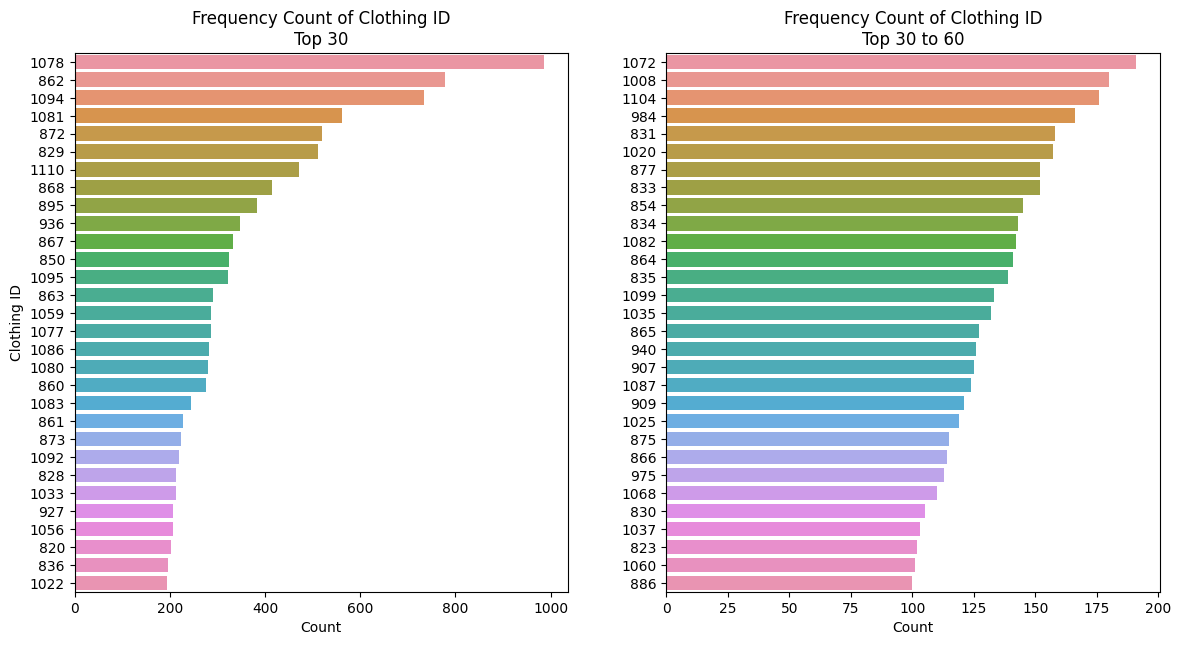

Dataframe Dimension: 22627 Rows


In [64]:
# 리뷰가 가장 많은 제품 (Clothing ID) 상위 60개를 시각화
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
              order= df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[num:60].index)],
              order= df["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(df.shape[0]))

In [65]:
# Age 분포 확인, 34-52세가 가장 많음
import plotly.express as px
fig = px.histogram(df['Age'], marginal='box',
                   labels={'value': 'Age'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [66]:
# Rating, Recommended IND 분포 확인

from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import plot

rating = df['Rating'].value_counts()
# 2 subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

recommended = df['Recommended IND'].value_counts()
recommended = df['Recommended IND'].value_counts().sort_values(ascending=False)

# 1. Rating
fig.add_trace(go.Pie(values=rating.values,
             labels=rating.index, 
             marker=dict(colors=['#fddbc7','#f4a582','#d6604d','#b2182b','#67001f']),
             title= 'Rating',titlefont=dict(size=17)),row=1,col=1)

# 2. Recommended IND
fig.add_trace(go.Pie(values=recommended.values, 
             labels=recommended.index, 
             marker=dict(colors=['#fddbc7','#b2182b']),
             title= 'Recommended IND',titlefont=dict(size=17)),row=1,col=2)

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

### **텍스트 데이터 전처리**

In [67]:
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,Text_Length,Word Count
0,767,33,4,1,0,Initmates,Intimate,Intimates,- Absolutely wonderful - silky and sexy and co...,55,9
1,1080,34,5,1,4,General,Dresses,Dresses,- Love this dress! it's sooo pretty. i happe...,305,63
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,102
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,25
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,38


In [68]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
def cleaning_text(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [70]:
import nltk
stop_words = stopwords.words('english')

In [71]:
text = cleaning_text(str(df["Text"]))
text

'absolutely wonderful silky sexy co love dress sooo pretty happe major design flaw high hope favorite buy love love love jump flattering shirt shirt flattering great dress many occasion happ wish made cotton reminds cute see fit well cute dress perfect summer party please make like one dress name text length dtype object'

In [72]:
df["new_review"] = df["Text"].apply(cleaning_text)
df["new_review"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    major design flaw high hope dress really wante...
3    favorite buy love love love jumpsuit fun flirt...
4    flattering shirt shirt flattering due adjustab...
Name: new_review, dtype: object

In [73]:
# " ".join(df["review_text"]).split()

# word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()

# rare_words = word_values[word_values <= 2]

# df["review_text"] = df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22627 entries, 0 to 22627
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22627 non-null  int64 
 1   Age                      22627 non-null  int64 
 2   Rating                   22627 non-null  int64 
 3   Recommended IND          22627 non-null  int64 
 4   Positive Feedback Count  22627 non-null  int64 
 5   Division Name            22627 non-null  object
 6   Department Name          22627 non-null  object
 7   Class Name               22627 non-null  object
 8   Text                     22627 non-null  object
 9   Text_Length              22627 non-null  int64 
 10  Word Count               22627 non-null  int64 
 11  new_review               22627 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


In [75]:
df["Recommended IND"].value_counts()

1    18526
0     4101
Name: Recommended IND, dtype: int64

In [76]:
df["Rating"].value_counts()

5    12526
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [77]:
df['Class'] = 0  # 기본적으로 모든 행에 0을 할당

# "Rating"이 4 이상인 행에 1을 할당
df.loc[df['Rating'] >= 4, 'Class'] = 1

# "Rating"이 3 이하인 행에 0을 할당
df.loc[df['Rating'] <= 3, 'Class'] = 0

In [78]:
df["Class"].value_counts()

1    17434
0     5193
Name: Class, dtype: int64

In [79]:
pos_words =" ".join(df[df["Rating"] > 4].new_review).split()
pos_words


['love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'favorite',
 'buy',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'flattering',
 'shirt',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'cagrcoal',
 'shimmer',
 'fun',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',

In [80]:
#pos_words =" ".join(df[df["recommended_ind"] == 1].review_text).split()
# neg_words = " ".join(df[df["recommended_ind"] == 0].review_text).split()

In [81]:
neg_words = " ".join(df[df["Rating"] < 3].new_review).split()
neg_words 

['petite',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'look',
 'like',
 'first',
 'pullover',
 'styling',
 'side',
 'zipper',
 'wouldnt',
 'purchased',
 'knew',
 'side',
 'zipper',
 'large',
 'bust',
 'side',
 'zipper',
 'next',
 'impossible',
 'second',
 'tulle',
 'feel',
 'look',
 'cheap',
 'slip',
 'awkward',
 'tight',
 'shape',
 'underneath',
 'look',
 'like',
 'described',
 'sadly',
 'returning',
 'im',
 'sure',
 'find',
 'something',
 'exchange',
 'huge',
 'disappointment',
 'waiting',
 'sweater',
 'coat',
 'ship',
 'week',
 'excited',
 'arrive',
 'coat',
 'true',
 'size',
 'made',
 'look',
 'short',
 'squat',
 

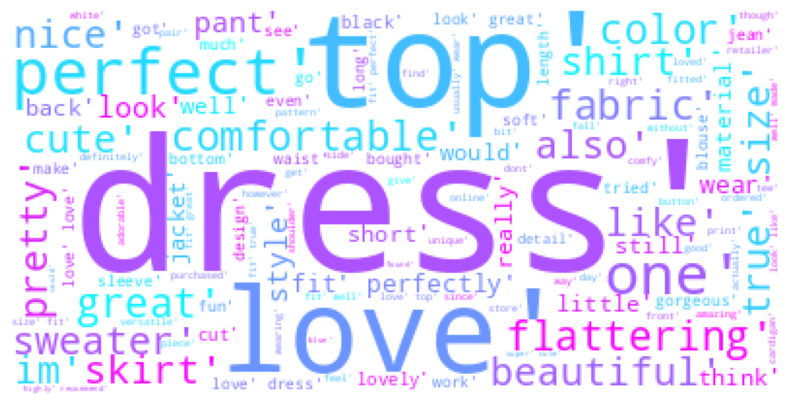

In [82]:
# 긍정적인 리뷰 용어 250개 뽑기

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words =250, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

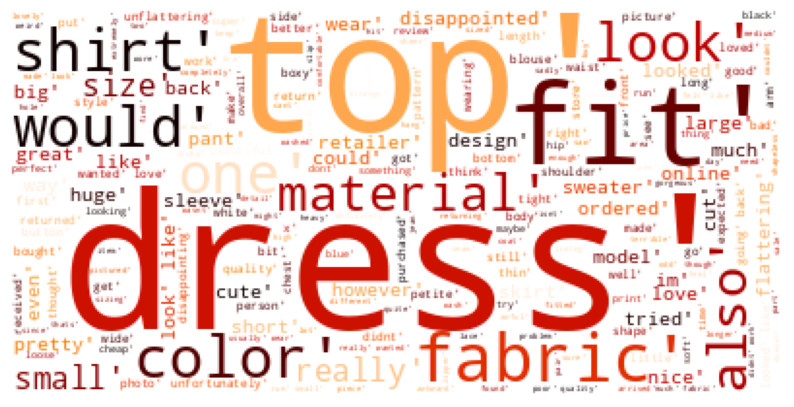

In [83]:
# 부정적인 리뷰 용어 250개 뽑기
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4. 딥러닝 알고리즘 적용

### `Process 4`:  모델 선택

> 해당 모델을 왜 선택하였는가?

> RNN은 순차적인 데이터를 처리하기에 적합한 모델이다. 리뷰와 같은 텍스트 데이터는 순서가 있는 시퀀스 데이터로 볼 수 있기 때문이다.

> LSTM은 RNN의 한 종류로, RNN의 단점인 장기 의존성 문제를 해결한다. 또한, 기존의 RNN에 비해 더 긴 문맥을 고려할 수 있어 텍스트 감성 분석에 유리하기 때문이다.

> GRU는 LSTM과 마찬가지로 장기 의존성 문제를 해결하기 위해 제안된 RNN의 변형이다. GRU는 LSTM과 유사한 성능을 가지면서도 더 간단한 구조를 가지고 있어, 모델의 복잡성을 줄이고 계산 비용을 낮출 수 있기 때문이다.


In [84]:
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix # plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

In [85]:
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,Text_Length,Word Count,new_review,Class
0,767,33,4,1,0,Initmates,Intimate,Intimates,- Absolutely wonderful - silky and sexy and co...,55,9,absolutely wonderful silky sexy comfortable,1
1,1080,34,5,1,4,General,Dresses,Dresses,- Love this dress! it's sooo pretty. i happe...,305,63,love dress sooo pretty happened find store im ...,1
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,102,major design flaw high hope dress really wante...,0
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,25,favorite buy love love love jumpsuit fun flirt...,1
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,38,flattering shirt shirt flattering due adjustab...,1


In [86]:
df.new_review

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        major design flaw high hope dress really wante...
3        favorite buy love love love jumpsuit fun flirt...
4        flattering shirt shirt flattering due adjustab...
                               ...                        
22623    great dress many occasion happy snag dress gre...
22624    wish made cotton reminds maternity clothes sof...
22625    cute see fit well top see never would worked i...
22626    cute dress perfect summer party bought dress w...
22627    please make like one dress lovely platinum fem...
Name: new_review, Length: 22627, dtype: object

In [87]:
X = df['new_review']
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print('학습용:', X_train.shape, y_train.shape)
print('검증용:', X_val.shape, y_val.shape)
print('평가용:', X_test.shape, y_test.shape)

학습용: (14480,) (14480,)
검증용: (3621,) (3621,)
평가용: (4526,) (4526,)


In [88]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

print(f'학습 데이터에 있는 문서의 평균 토큰 수: {np.mean([len(sent) for sent in X_train], dtype=int)}')

학습 데이터에 있는 문서의 평균 토큰 수: 195


In [89]:
maxlen = 300

Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='post')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='post')

In [90]:
import tensorflow as tf
from keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

### 모델 1 : LSTM 모델

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalAveragePooling1D, Dense

# 임베딩 벡터 차원
embedding_dim = 100

# LSTM 모델 구성
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=128, return_sequences=True))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])

model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 300, 128)          117248    
                                                                 
 global_average_pooling1d_3   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                      

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [93]:
pd.Series(y_train).value_counts(normalize=True) 

1    0.770511
0    0.229489
Name: Class, dtype: float64

In [94]:
weights = {0:77, 1:22}

In [95]:
model.fit(Padded_train, y_train, epochs=10, batch_size=32, class_weight=weights,
         validation_data=(Padded_val, y_val), callbacks=[early_stop])

Epoch 1/10
453/453 [==============================] - 73s 143ms/step - loss: 20.9506 - f1_score: 0.6618 - val_loss: 0.5434 - val_f1_score: 0.8436
Epoch 2/10
453/453 [==============================] - 13s 29ms/step - loss: 15.8878 - f1_score: 0.8777 - val_loss: 0.4602 - val_f1_score: 0.9092
Epoch 3/10
453/453 [==============================] - 11s 24ms/step - loss: 14.9074 - f1_score: 0.9253 - val_loss: 1.3807 - val_f1_score: 0.0000e+00
Epoch 4/10
453/453 [==============================] - 11s 24ms/step - loss: 18.9300 - f1_score: 0.6991 - val_loss: 0.4739 - val_f1_score: 0.9085
Epoch 5/10
453/453 [==============================] - 8s 18ms/step - loss: 14.0317 - f1_score: 0.9332 - val_loss: 0.5055 - val_f1_score: 0.9079
Epoch 5: early stopping


In [96]:
Padded_val2 = Padded_val.copy()
Padded_val3 = Padded_val.copy()
y_val2 = y_val.copy()
y_val3 = y_val.copy()

test_evaluate = model.evaluate(Padded_val, y_val)

114/114 [==============================] - 1s 8ms/step - loss: 0.4602 - f1_score: 0.9092


In [97]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(Padded_val)
y_pred_ = []

for i in range(len(y_pred)) :
  if y_pred[i][0] > 0.5 :
    y_pred_.append(1)
  else:
    y_pred_.append(0)
y_pred_ 

print(confusion_matrix(y_val, y_pred_))

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_))

114/114 [==============================] - 1s 6ms/step
[[ 588  243]
 [ 251 2539]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       831
           1       0.91      0.91      0.91      2790

    accuracy                           0.86      3621
   macro avg       0.81      0.81      0.81      3621
weighted avg       0.86      0.86      0.86      3621



### 모델 2 : GRU 모델

In [98]:
from keras.layers import GRU

# 임베딩 벡터 차원
embedding_dim = 100

# GRU 모델 구성
model2 = Sequential()
model2.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen))
model2.add(GRU(units=128, return_sequences=True))
model2.add(GlobalAveragePooling1D())
model2.add(Dropout(0.5))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=1, activation='sigmoid'))

# 모델 컴파일
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 gru_1 (GRU)                 (None, 300, 128)          88320     
                                                                 
 global_average_pooling1d_4   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                      

In [99]:
model2.fit(Padded_train, y_train, epochs=10, batch_size=32, class_weight=weights,
         validation_data=(Padded_val, y_val), callbacks=[early_stop])

Epoch 1/10
453/453 [==============================] - 36s 73ms/step - loss: 20.3182 - f1_score: 0.6073 - val_loss: 0.3947 - val_f1_score: 0.8844
Epoch 2/10
453/453 [==============================] - 12s 26ms/step - loss: 10.3973 - f1_score: 0.9148 - val_loss: 0.3877 - val_f1_score: 0.8811
Epoch 3/10
453/453 [==============================] - 10s 22ms/step - loss: 8.0143 - f1_score: 0.9366 - val_loss: 0.3373 - val_f1_score: 0.9049
Epoch 4/10
453/453 [==============================] - 8s 18ms/step - loss: 6.1840 - f1_score: 0.9535 - val_loss: 0.3821 - val_f1_score: 0.9140
Epoch 5/10
453/453 [==============================] - 8s 18ms/step - loss: 4.9947 - f1_score: 0.9625 - val_loss: 0.3329 - val_f1_score: 0.9147
Epoch 6/10
453/453 [==============================] - 10s 21ms/step - loss: 3.7844 - f1_score: 0.9723 - val_loss: 0.4145 - val_f1_score: 0.8954
Epoch 7/10
453/453 [==============================] - 7s 16ms/step - loss: 3.1134 - f1_score: 0.9773 - val_loss: 0.4550 - val_f1_score: 

In [100]:
test_evaluate = model2.evaluate(Padded_val2, y_val2)

114/114 [==============================] - 1s 10ms/step - loss: 0.3329 - f1_score: 0.9147


In [101]:
from sklearn.metrics import confusion_matrix
y_pred2 = model2.predict(Padded_val2)
y_pred2_ = []

for i in range(len(y_pred2)) :
  if y_pred2[i][0] > 0.5 :
    y_pred2_.append(1)
  else:
    y_pred2_.append(0)
y_pred2_ 

print(confusion_matrix(y_val2, y_pred2_))

from sklearn.metrics import classification_report
print(classification_report(y_val2, y_pred2_))

114/114 [==============================] - 1s 6ms/step
[[ 646  185]
 [ 273 2517]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       831
           1       0.93      0.90      0.92      2790

    accuracy                           0.87      3621
   macro avg       0.82      0.84      0.83      3621
weighted avg       0.88      0.87      0.88      3621



### 모델 3 : RNN 모델

In [102]:
from keras.layers import SimpleRNN

# 임베딩 벡터 차원
embedding_dim = 100

# RNN 모델 구성
model3 = Sequential()
model3.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen))
model3.add(SimpleRNN(units=128, return_sequences=True))
model3.add(GlobalAveragePooling1D())
model3.add(Dropout(0.5))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=1, activation='sigmoid'))

# 모델 컴파일
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 300, 128)          29312     
                                                                 
 global_average_pooling1d_5   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                      

In [103]:
model3.fit(Padded_train, y_train, epochs=10, batch_size=32, class_weight=weights,
         validation_data=(Padded_val, y_val), callbacks=[early_stop])

Epoch 1/10
453/453 [==============================] - 208s 445ms/step - loss: 22.9910 - f1_score: 0.6126 - val_loss: 0.6000 - val_f1_score: 0.8933
Epoch 2/10
453/453 [==============================] - 178s 394ms/step - loss: 23.1402 - f1_score: 0.3444 - val_loss: 0.7056 - val_f1_score: 0.0416
Epoch 3/10
453/453 [==============================] - 162s 358ms/step - loss: 18.9629 - f1_score: 0.8617 - val_loss: 0.5287 - val_f1_score: 0.9014
Epoch 4/10
453/453 [==============================] - 167s 369ms/step - loss: 18.5143 - f1_score: 0.8496 - val_loss: 0.4963 - val_f1_score: 0.8571
Epoch 5/10
453/453 [==============================] - 161s 355ms/step - loss: 17.8987 - f1_score: 0.8665 - val_loss: 0.5634 - val_f1_score: 0.8914
Epoch 6/10
453/453 [==============================] - 164s 363ms/step - loss: 17.0165 - f1_score: 0.9034 - val_loss: 0.5126 - val_f1_score: 0.8717
Epoch 7/10
453/453 [==============================] - 158s 349ms/step - loss: 18.6146 - f1_score: 0.7822 - val_loss: 0

In [104]:
test_evaluate = model3.evaluate(Padded_val3, y_val3)

114/114 [==============================] - 3s 26ms/step - loss: 0.4466 - f1_score: 0.9002


In [105]:
from sklearn.metrics import confusion_matrix
y_pred3 = model3.predict(Padded_val3)
y_pred3_ = []

for i in range(len(y_pred3)) :
  if y_pred3[i][0] > 0.5 :
    y_pred3_.append(1)
  else:
    y_pred3_.append(0)
y_pred3_ 

print(confusion_matrix(y_val3, y_pred3_))

from sklearn.metrics import classification_report
print(classification_report(y_val3, y_pred3_))

114/114 [==============================] - 5s 45ms/step
[[ 556  275]
 [ 270 2520]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       831
           1       0.90      0.90      0.90      2790

    accuracy                           0.85      3621
   macro avg       0.79      0.79      0.79      3621
weighted avg       0.85      0.85      0.85      3621



### 모델 검증 ( + Chance Level: 0.5), 일반화 성능 확인

> 모델 1 RNN 모델의 성능 결과, F1 Score : 90.02

> 모델 2 LSTM 모델의 성능 결과, F1 Score : 90.92

> 모델 3 GRU 모델의 성능 결과, F1 Score : 91.47

> 따라서 F1 Score 기준 성능이 가장 높은 GRU 모델로 일반화 성능을 확인해본 결과, F1 Score : 89.87 을 얻음

In [106]:
Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='post')

test_evaluate = model3.evaluate(Padded_test, y_test)

142/142 [==============================] - 4s 27ms/step - loss: 0.4519 - f1_score: 0.8987


In [107]:
from sklearn.metrics import confusion_matrix
y_pred4 = model3.predict(Padded_test)
y_pred4_ = []

for i in range(len(y_pred4)) :
  if y_pred4[i][0] > 0.5 :
    y_pred4_.append(1)
  else:
    y_pred4_.append(0)
y_pred4_ 

print(confusion_matrix(y_test, y_pred4_))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4_))

142/142 [==============================] - 5s 32ms/step
[[ 665  374]
 [ 325 3162]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66      1039
           1       0.89      0.91      0.90      3487

    accuracy                           0.85      4526
   macro avg       0.78      0.77      0.78      4526
weighted avg       0.84      0.85      0.84      4526



## 5. 모델 활용
### `Process 5`:  가설 확인 및 활용 사례

> 성능이 제일 좋은 모델로 가설을 확인 
1. 추천이 존재하지 않는 상품이라면, 부정적인 감성일 것이다.
2. 같은 제품군을 가진 제품 중에서 리뷰의 길이가 긴 경우 감성 점수가 긍정적일 것이다.
- (같은 제품 상위 카테고리(Division Name), 제품 부서(Department Name), 제품 하위 카테고리(Class Name)을 가진 제품)

In [115]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clothing ID,22627.0,919.691386,201.687114,1.0,861.0,936.0,1078.0,1205.0
Age,22627.0,43.283157,12.328378,18.0,34.0,41.0,52.0,99.0
Rating,22627.0,4.183056,1.115923,1.0,4.0,5.0,5.0,5.0
Recommended IND,22627.0,0.818756,0.385228,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22627.0,2.631900,5.787621,0.0,0.0,1.0,3.0,122.0
Text_Length,22627.0,326.492995,147.213635,13.0,202.0,319.0,478.0,557.0
Word Count,22627.0,63.250453,29.019469,3.0,39.0,62.0,92.0,121.0
Class,22627.0,0.770495,0.420524,0.0,1.0,1.0,1.0,1.0


579/579 [==============================] - 4s 7ms/step


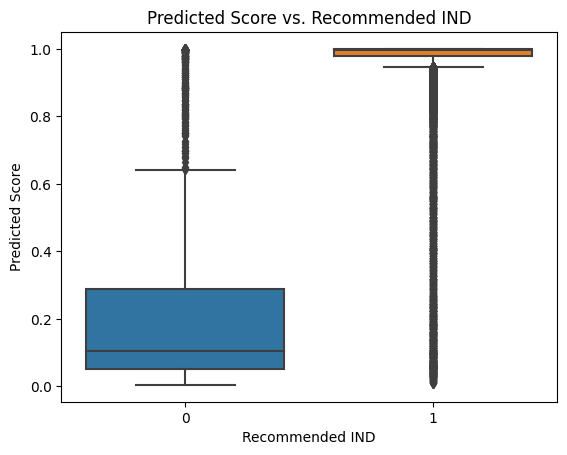

In [109]:
# 1. 추천이 존재하지 않는 상품이라면, 부정적인 감성일 것이다.

import seaborn as sns

# 추천이 존재하는 제품에 대한 데이터 필터링
recommended_products = df[df['Recommended IND'] == 1]

# 추천이 존재하는 제품 데이터를 입력으로 사용하여 감성 점수 예측
recommended_X = recommended_products['new_review']
recommended_y = recommended_products['Class']
recommended_tokenized = tokenizer.texts_to_sequences(recommended_X)
recommended_padded = pad_sequences(recommended_tokenized, maxlen=maxlen, padding='post')
predicted_scores = model2.predict(recommended_padded)

# 예측된 감성 점수와 실제 추천 여부 비교 및 시각화
comparison_df = pd.DataFrame({'Predicted Score': predicted_scores.flatten(), 'Recommended IND': recommended_y})

sns.boxplot(x='Recommended IND', y='Predicted Score', data=comparison_df)
plt.xlabel('Recommended IND')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs. Recommended IND')
plt.show()

17/17 [==============================] - 0s 9ms/step


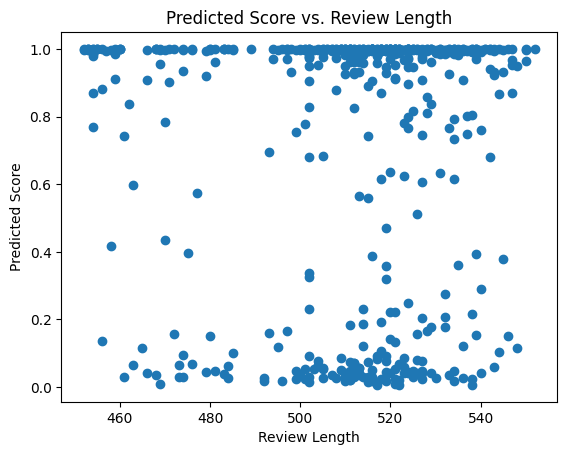

In [111]:
import matplotlib.pyplot as plt

# 같은 제품 카테고리에 대한 데이터 필터링
target_division = 'General'  # 원하는 제품 상위 카테고리 설정
target_department = 'Tops'  # 원하는 제품 부서 설정
target_class = 'Blouses'  # 원하는 제품 하위 카테고리 설정

same_category_products = df[(df['Division Name'] == target_division) & 
                            (df['Department Name'] == target_department) & 
                            (df['Class Name'] == target_class)]
                            
# 리뷰의 길이에 따라 데이터 필터링
long_reviews = same_category_products[same_category_products['Text_Length'] > 450]

# 필터링된 데이터를 입력으로 사용하여 감성 점수 예측
long_X = long_reviews['new_review']
long_y = long_reviews['Class']
long_tokenized = tokenizer.texts_to_sequences(long_X)
long_padded = pad_sequences(long_tokenized, maxlen=maxlen, padding='post')
predicted_scores = model2.predict(long_padded)

# 예측된 감성 점수와 리뷰의 길이 비교 및 시각화
comparison_df = pd.DataFrame({'Predicted Score': predicted_scores.flatten(), 'Review Length': long_reviews['Text_Length']})

plt.scatter(comparison_df['Review Length'], comparison_df['Predicted Score'])
plt.xlabel('Review Length')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs. Review Length')
plt.show()

In [132]:
def tokenization(inputs): 
    return word_tokenize(inputs)

In [133]:
def stopwords_remove(inputs):  
    return [k for k in inputs if k not in stop_words]

In [134]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):  
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]

In [139]:
def predict_recommendation(input_text):  # The function for doing all the previous steps
    input_text = input_text.lower()
    input_text = re.sub(r'[^a-zA-Z]', ' ', input_text)
    input_text = tokenization(input_text)
    input_text = stopwords_remove(input_text)
    input_text = lemmatization(input_text)
    input_text = ' '.join(input_text)
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = pad_sequences(input_text, maxlen=maxlen, padding='post')
    input_text = model2.predict(input_text)
    if input_text >= 0.5:
        input_text = f'Recommended with %{round(float(input_text*100), 2)}'
    else:
        input_text = f'Not Recommended with %{round(float(input_text*100), 2)}'

    return print(input_text)

In [145]:
import re 

# A 고객 예시 : 긍정 96.96% -> 부정 3.04%
A_text = "I'm quite pleased with the t-shirts I bought. The fit is decent, and the overall quality is satisfactory. They offer a nice option for those seeking comfortable and presentable attire."
predict_recommendation(A_text)

1/1 [==============================] - 0s 22ms/step
Recommended with %91.52


In [154]:
# 긍정적인 리뷰를 남긴 A 고객에게 
# 다른 카테고리 제품(Layering) + 추천 (Recommended IND) 제품 + 텍스트 길이 (Text_Length) 450자 이상인 제품을 추천해준다.

# 추천 시스템을 위한 필터링 조건 설정
category = 'Layering'
recommended = 1
min_text_length = 450

# 같은 카테고리(dress), 추천 제품(Recommended IND), 텍스트 길이(Text_Length) 450자 이상인 제품 필터링
recommended_products = df[(df['Class Name'] == category) & (df['Recommended IND'] == recommended) & (df['Text_Length'] >= min_text_length)]

# 추천 제품 목록 출력
recommended_product_list = recommended_products['Clothing ID'].unique()
print("Recommended Products:")
for product_id in recommended_product_list:
    print(f"- Product ID: {product_id}")

Recommended Products:
- Product ID: 121
- Product ID: 585
- Product ID: 295
- Product ID: 439
- Product ID: 549
- Product ID: 61
- Product ID: 545
- Product ID: 261
- Product ID: 263
- Product ID: 139
- Product ID: 520
- Product ID: 166
- Product ID: 296


In [146]:
# B 고객 예시 : 긍정 9.16% -> 부정 90.84%
B_text = "The dress does not look like the dress pictures. The material seems cheaper and this does not fit well. It’s way too big. I requested to return for a refund and now I have to pay to ship it back as well. If I could give zero stars I would. Would not recommend."

predict_recommendation(B_text)

1/1 [==============================] - 0s 35ms/step
Not Recommended with %6.59


In [153]:
# 부정적인 리뷰를 남긴 B 고객에게 
# 같은 카테고리 제품(dress) + 추천 (Recommended IND) 제품 + 텍스트 길이 (Text_Length) 450자 이상인 제품을 추천해준다.

# 추천 시스템을 위한 필터링 조건 설정
category = 'Dresses'
recommended = 1
min_text_length = 450

# 같은 카테고리(dress), 추천 제품(Recommended IND), 텍스트 길이(Text_Length) 450자 이상인 제품 필터링
recommended_products = df[(df['Class Name'] == category) & (df['Recommended IND'] == recommended) & (df['Text_Length'] >= min_text_length)]

# 추천 제품 목록 출력
recommended_product_list = recommended_products['Clothing ID'].unique()
print("Recommended Products:")
for product_id in recommended_product_list:
    print(f"- Product ID: {product_id}")

Recommended Products:
- Product ID: 1095
- Product ID: 1077
- Product ID: 1080
- Product ID: 1081
- Product ID: 1072
- Product ID: 1104
- Product ID: 1094
- Product ID: 1075
- Product ID: 1089
- Product ID: 1086
- Product ID: 1083
- Product ID: 1078
- Product ID: 1087
- Product ID: 1110
- Product ID: 1111
- Product ID: 1099
- Product ID: 1098
- Product ID: 1092
- Product ID: 1197
- Product ID: 1097
- Product ID: 1102
- Product ID: 1100
- Product ID: 1085
- Product ID: 1076
- Product ID: 1084
- Product ID: 1082
- Product ID: 1091
- Product ID: 1088
- Product ID: 1101
- Product ID: 13
- Product ID: 1103
- Product ID: 1096
- Product ID: 1151
- Product ID: 1074
- Product ID: 1093
- Product ID: 1079
- Product ID: 1108
- Product ID: 1153
- Product ID: 1106
- Product ID: 1150
- Product ID: 1149
- Product ID: 1193
- Product ID: 1109
- Product ID: 1107


## 6. 결론

### `Process 6`:  결론

> **한계 및 개선 방안**

> 데이터 관점
- 제품('Clothing ID')과 연동하는 이미지 사진이 있었다면, 스타일, 색상 등 더 많은 분석이 가능했을 것이라고 생각한다.
- 한 고객이 여러 제품을 구매한 경우를 알 수 있는 데이터 정보가 없어서 아쉬웠다.
-> 이를 위해 추후 데이터 보충 및 추가 필요

> 모델링 관점
- 긍정과 부정인 단순 이진 분류 모델이라 다중 분류 모델로의 시도를 못해본 점이 많이 아쉽다.
- 다양한 하이퍼 파라미터 조합을 시도해보지 못한 점이 아쉽다.
- 사전 훈련된 언어 모델(예: BERT)을 활용하여 문맥을 더 잘 이해할 수 있는 모델을 구축해보지 못한 점이 아쉽다.
-> 이를 위해 BERT 코드 구현 시도

> 비즈니스 관점
- 고객 리뷰를 통한 감성 분석에 따른 상품 추천을 하고자 했으나, 나름대로 가설로 얻은 인사이트를 가지고 단순하게나마 상품 추천을 구현해보았지만 다양한 변수를 가지고 깊이 있는 시스템을 구현하지 못해 아쉬움이 남는다.
-> 이를 위해 추천 알고리즘 이해 및 코드 구현 시도